In [50]:
import sys
import pathlib
import numpy as np

In [51]:
%pip install scikit-learn
%pip install matplotlib
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
digits = sk.datasets.load_digits()

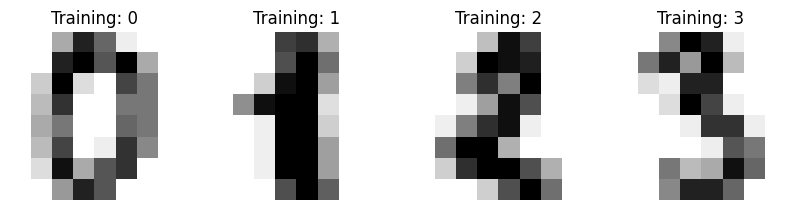

In [53]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [54]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_val, y_train, y_val = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

In [55]:
import nn

nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation:': 'sigmoid'}]

autoencoder = nn.NeuralNetwork(nn_arch, lr=0.05, seed=42, batch_size=100, epochs=10, loss_function='mean squared error')

In [56]:
autoencoder.fit(X_train, y_train, X_val, y_val)

ValueError: shapes (16,64) and (15,65) not aligned: 64 (dim 1) != 15 (dim 0)